In [35]:
import numpy as np
import matplotlib.pyplot as plt
import ast

In [36]:
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
print(len(voltages))
# Load the 2D array from the CSV file
loaded_arr = np.loadtxt("data/raw_data.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
real_values = loaded_arr.reshape((313, 2, 144))

313


In [37]:
print(real_values[0][0])
print(real_values[0][1])

[1537.8360221  1537.92165746 1538.24486188    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.       

In [38]:
masked_values = np.ma.array(real_values)
masked_values = np.ma.masked_where(masked_values == 0.0, masked_values) #masks all values that are 0
print(masked_values.shape)
print(masked_values)

(313, 2, 144)
[[[1537.8360220994434 1537.9216574585564 1538.2448618784344 ... -- -- --]
  [-16.012779552715607 -16.204472843450432 -22.27476038338657 ... -- --
   --]]

 [[1537.7227624309392 1537.7365745856348 1537.739337016574 ... -- -- --]
  [-15.30990415335458 -15.405750798721993 -15.373801916932855 ... -- --
   --]]

 [[1537.7227624309392 1537.7365745856348 1537.739337016574 ... -- -- --]
  [-15.30990415335458 -15.405750798721993 -15.373801916932855 ... -- --
   --]]

 ...

 [[1537.7365745856348 1537.7890607734782 1537.7918232044174 ... -- -- --]
  [-16.268370607028707 -16.587859424920083 -16.587859424920083 ... -- --
   --]]

 [[1537.7282872928174 1537.7531491712696 1537.761436464087 ... -- -- --]
  [-16.396166134185258 -16.683706070287496 -16.715654952076633 ... -- --
   --]]

 [[1537.9658563535825 1538.2061878452866 1538.2199999999823 ... -- -- --]
  [-21.731629392971232 -17.16293929712456 -17.067092651757147 ... -- --
   --]]]


In [39]:
print(len(voltages))

313


In [40]:
# y_values = [0,0,100,97,98,0,99,101,0,102,99,105,101]
# x_values = [0,1,2,3,4,5,6,7,8,9,10,11,12]

# #give a threshold
# threshold = 0

# #prepare for masking arrays - 'conventional' arrays won't do it
# y_values = np.ma.array(y_values)
# #mask values below a certain threshold
# y_values_masked = np.ma.masked_where(y_values < threshold , y_values)

In [41]:
# new_values = np.zeros((314, 2, 144))
# for i in range(0,2): #len(load_original_arr)):
#     for j in range(0, 2):
#         line = np.zeros((2,144))
#         y = np.ma.array(load_original_arr[i][j])
#         y = np.ma.masked_where(y == 0.0, y)
#         print(y)
#         line[j] = y
#         print(line[j])
#     new_values[i] = line
#     # targetx = load_original_arr[i][0]
#     # targety = load_original_arr[i][1]
#     # tmpx = targetx[targetx != 0]
#     # tmpy = targety[targety != 0]
#     # line = []
#     # line.append(tmpx)
#     # line.append(tmpy)
#     # new_values.append(line)

# #print(new_values[0][0])

In [42]:
#now i have all the x and y arrays in one big array
#so x would be new_values[n][0]
#and y would be new_values[n][1]
#with voltage[n] being the voltage
#next I need to graph 1 amd -1 to match them up as well as n=100 to check for differences

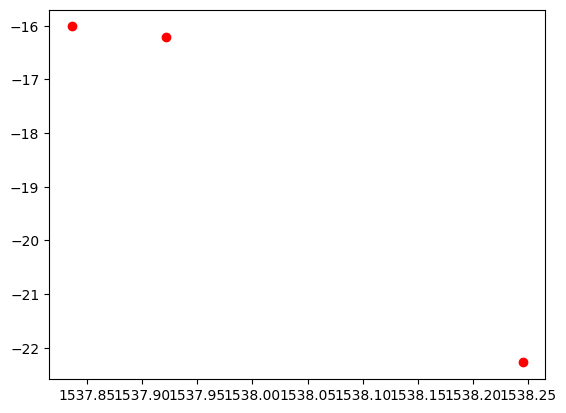

In [43]:

plt.plot(masked_values[0][0], masked_values[0][1], 'ro', label='data')
plt.show()

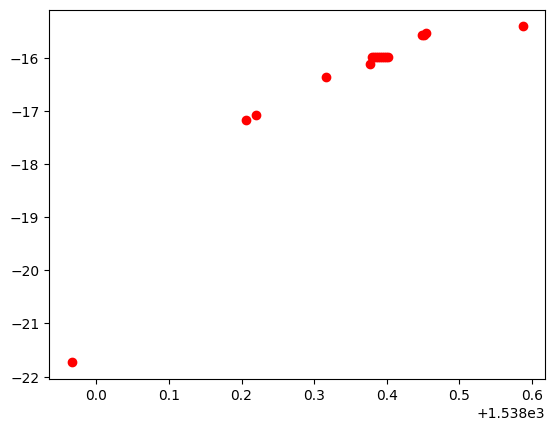

In [44]:
plt.plot(masked_values[312][0], masked_values[312][1], 'ro', label='data')
plt.show()

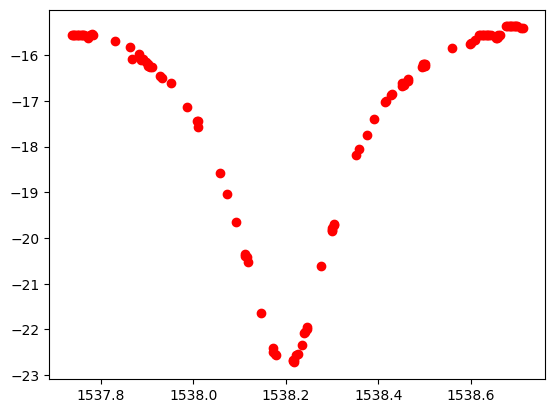

In [45]:
plt.plot(masked_values[243][0], masked_values[243][1], 'ro', label='data')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


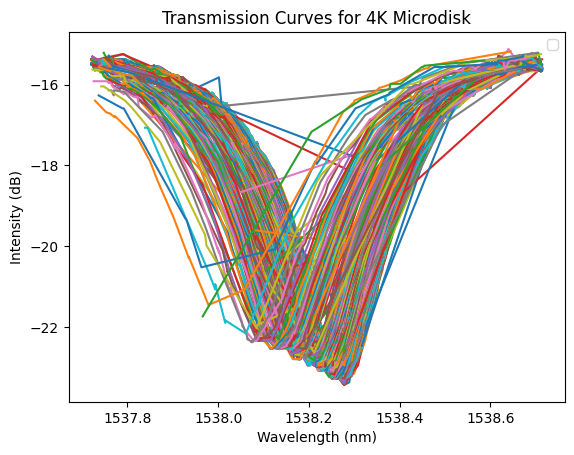

In [46]:
#This is everything, but we should clean up some noise.

for i in range(len(voltages)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.savefig("figures/4K-crude.png")
plt.show()

In [47]:
# set a threshold for the number of points in an array and mask the smaller ones 

threshold = 100
check = []
for i in range(len(real_values)):
    new_values = real_values[i][0][real_values[i][0] != 0]
    if len(new_values) < threshold:
        check.append(i)

print(len(check))
print(check)

84
[0, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 112, 137, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 163, 194, 195, 199, 204, 210, 212, 213, 214, 235, 245, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 272, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312]


In [48]:
#masks all arrays in the index: check
print(len(masked_values) - len(check))
check.append(311)
check.append(308)
masked_voltages = np.ma.array(voltages)
for i in check:
    masked_values[i][0] = np.ma.masked_greater(masked_values[i][0], 0)
    masked_values[i][1] = np.ma.masked_less(masked_values[i][1], 0)
    masked_voltages[i] = np.ma.masked

print(masked_values[0][0])
print(masked_values[0][1])
print(masked_voltages)

229
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -0.973333333333337 -0.9666666666666703 -0.9600000000000036
 -0.9533333333333369 -0.9466666666666702 -0.94000000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


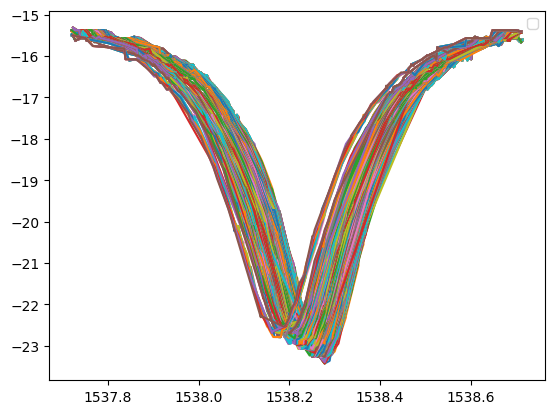

In [49]:
#nope! now we can re plot


for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.show()


In [50]:
#better, but still some noise
#The tops are generally fine, that'll get fixed in fits
#I should find a way to get rid of data with no full bottom curve
#I can see two in particular that are bad

#let's plot piece by piece to see what's going on
#we'll take down all the check values and mask those arrays


# for i in range(0,50):
#     plt.plot(masked_values[i][0], masked_values[i][1])
# plt.legend(loc = 'upper right')
# plt.show()

#this one has some issues. Ill expand and find them

In [51]:
#find the lowest value on the graph

#should be 15.142857142857174
test = masked_values[1][1]
lowest = 15.142857142857174
print(test[0])
print(test[0]+lowest)


-15.30990415335458
-0.16704701049740578


In [52]:
#i assume the top of the graph is 0 because there is around 15db of loss so I get rid of that and reposition the curve

#add the lowest value to each y value so the top is 0
        
for i in range(0,len(masked_values)):
    masked_values[i][1] = masked_values[i][1] + lowest


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


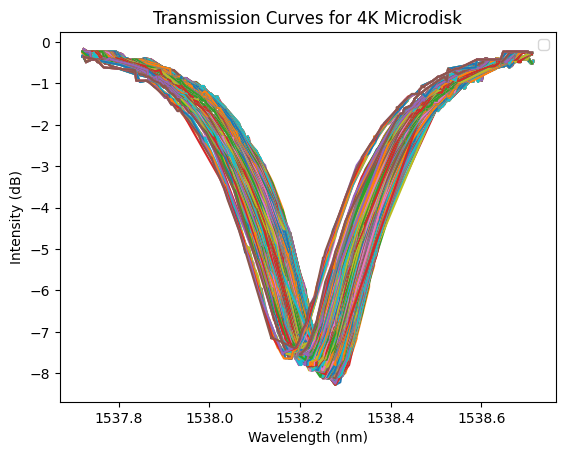

In [53]:
#lets regraph

for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.show()


In [54]:
print(masked_values[10][0])

[1537.739337016574 1537.742099447513 1537.7448618784522 1537.7476243093913
 1537.7503867403304 1537.7531491712696 1537.7559116022087
 1537.7586740331478 1537.761436464087 1537.764198895026 1537.7669613259652
 1537.7697237569043 1537.7724861878435 1537.7752486187826
 1537.7780110497217 1537.7807734806609 1537.7835359116 1537.786298342539
 1537.7890607734782 1537.7918232044174 1537.8166850828695
 1537.8194475138087 1537.8194475138087 1537.8222099447478
 1537.8222099447478 1537.824972375687 1537.827734806626 1537.8304972375652
 1537.8332596685043 1537.8360220994434 1537.8387845303826
 1537.8415469613217 1537.8443093922608 1537.8470718232 1537.849834254139
 1537.8553591160173 1537.8581215469565 1537.8581215469565
 1537.8608839778956 1537.8664088397738 1537.9382320441912
 1537.9409944751303 1537.9437569060694 1537.9465193370086
 1537.9492817679477 1537.976906077339 1537.976906077339 1537.979668508278
 1537.9824309392172 1537.9851933701564 1537.999005524852
 1538.0017679557911 1538.004530386

In [55]:
#sick, I did it. Now I need to convert from dB to a fraction. I can check the binary code for this.

def dB2Frac(dB):
    return 10**(dB/10)

In [56]:
#run all values through dB2Frac

for i in range(0,len(masked_values)):
    masked_values[i][1] = dB2Frac(masked_values[i][1])

In [57]:
print(masked_values[10][0])

[1537.739337016574 1537.742099447513 1537.7448618784522 1537.7476243093913
 1537.7503867403304 1537.7531491712696 1537.7559116022087
 1537.7586740331478 1537.761436464087 1537.764198895026 1537.7669613259652
 1537.7697237569043 1537.7724861878435 1537.7752486187826
 1537.7780110497217 1537.7807734806609 1537.7835359116 1537.786298342539
 1537.7890607734782 1537.7918232044174 1537.8166850828695
 1537.8194475138087 1537.8194475138087 1537.8222099447478
 1537.8222099447478 1537.824972375687 1537.827734806626 1537.8304972375652
 1537.8332596685043 1537.8360220994434 1537.8387845303826
 1537.8415469613217 1537.8443093922608 1537.8470718232 1537.849834254139
 1537.8553591160173 1537.8581215469565 1537.8581215469565
 1537.8608839778956 1537.8664088397738 1537.9382320441912
 1537.9409944751303 1537.9437569060694 1537.9465193370086
 1537.9492817679477 1537.976906077339 1537.976906077339 1537.979668508278
 1537.9824309392172 1537.9851933701564 1537.999005524852
 1538.0017679557911 1538.004530386

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


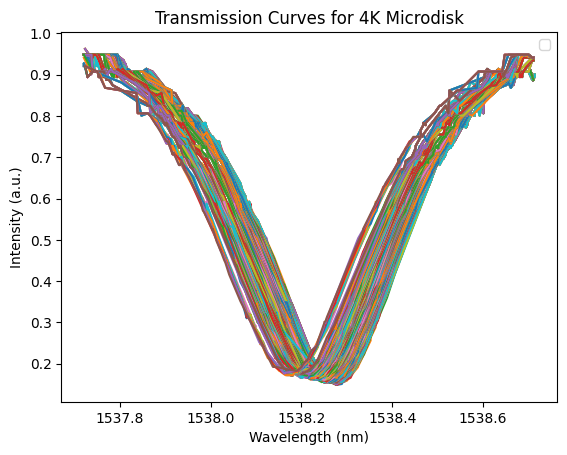

In [58]:
#lets regraph again

for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()


In [59]:
normalized_values = np.ma.getdata(masked_values)
data_mask = np.ma.getmask(masked_values)


In [60]:
print(data_mask[10][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True]


In [61]:
# Reshape the data and the mask to 2D array
data_reshaped = normalized_values.reshape(normalized_values.shape[0], -1)
mask_reshaped = data_mask.reshape(data_mask.shape[0], -1)

# # Save the 2D array to a CSV file
np.savetxt("data/normalized_data.csv", data_reshaped, delimiter=",")
np.savetxt("data/cleaning_mask.csv", mask_reshaped, delimiter=",")
 
# # Load the 2D array from the CSV file
loaded_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
loaded_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
load_original_arr = loaded_data.reshape(313,2,144)
load_original_mask = loaded_mask.reshape(313,2,144)
 
# Verify if the loaded array matches the original
if np.array_equal(load_original_arr,normalized_values):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [62]:
# Verify if the loaded array matches the original
if np.array_equal(load_original_mask,data_mask):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [63]:
print(normalized_values.shape[0],normalized_values.shape[1],normalized_values.shape[2])
print(data_mask.shape[0],data_mask.shape[1],data_mask.shape[2])

313 2 144
313 2 144


In [64]:
clean_data = np.ma.masked_array(load_original_arr, load_original_mask)
if np.array_equal(masked_values,clean_data):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [65]:
i = 1
j = 1
print(masked_values[i][j])
print(clean_data[i][j])

[0.9622663499193959 0.941262234978194 0.9482121646353584
 0.9482121646353584 0.9482121646353584 0.9482121646353584
 0.9482121646353584 0.9482121646353584 0.9482121646353584
 0.9482121646353584 0.9482121646353584 0.9482121646353584
 0.9482121646353584 0.9482121646353584 0.9482121646353584
 0.9482121646353584 0.9482121646353584 0.9482121646353584
 0.9482121646353584 0.9482121646353584 0.9482121646353584
 0.9482121646353584 0.9343632448934597 0.92071659272961 0.9275148210190974
 0.8940183175709615 0.9006194157436495 0.9072692539658743
 0.9072692539658743 0.9072692539658743 0.9072692539658743
 0.9072692539658743 0.9072692539658743 0.9072692539658743
 0.9072692539658743 0.9072692539658743 0.9072692539658743
 0.9072692539658743 0.9072692539658743 0.9139681921160031
 0.9072692539658743 0.8006138420452173 0.8006138420452173
 0.7773982197576071 0.7831382385771717 0.7773982197576071
 0.7831382385771717 0.7717002724580195 0.7604293612245802
 0.7438308947925328 0.7383789795055973 0.738378979505597

In [66]:
volt_mask = np.ma.getmask(masked_voltages)
np.savetxt("data/voltage_mask.csv", volt_mask, delimiter = ",")

In [67]:
print(masked_values[10][0])

[1537.739337016574 1537.742099447513 1537.7448618784522 1537.7476243093913
 1537.7503867403304 1537.7531491712696 1537.7559116022087
 1537.7586740331478 1537.761436464087 1537.764198895026 1537.7669613259652
 1537.7697237569043 1537.7724861878435 1537.7752486187826
 1537.7780110497217 1537.7807734806609 1537.7835359116 1537.786298342539
 1537.7890607734782 1537.7918232044174 1537.8166850828695
 1537.8194475138087 1537.8194475138087 1537.8222099447478
 1537.8222099447478 1537.824972375687 1537.827734806626 1537.8304972375652
 1537.8332596685043 1537.8360220994434 1537.8387845303826
 1537.8415469613217 1537.8443093922608 1537.8470718232 1537.849834254139
 1537.8553591160173 1537.8581215469565 1537.8581215469565
 1537.8608839778956 1537.8664088397738 1537.9382320441912
 1537.9409944751303 1537.9437569060694 1537.9465193370086
 1537.9492817679477 1537.976906077339 1537.976906077339 1537.979668508278
 1537.9824309392172 1537.9851933701564 1537.999005524852
 1538.0017679557911 1538.004530386

In [68]:
print(clean_data[10][0])

[1537.739337016574 1537.742099447513 1537.7448618784522 1537.7476243093913
 1537.7503867403304 1537.7531491712696 1537.7559116022087
 1537.7586740331478 1537.761436464087 1537.764198895026 1537.7669613259652
 1537.7697237569043 1537.7724861878435 1537.7752486187826
 1537.7780110497217 1537.7807734806609 1537.7835359116 1537.786298342539
 1537.7890607734782 1537.7918232044174 1537.8166850828695
 1537.8194475138087 1537.8194475138087 1537.8222099447478
 1537.8222099447478 1537.824972375687 1537.827734806626 1537.8304972375652
 1537.8332596685043 1537.8360220994434 1537.8387845303826
 1537.8415469613217 1537.8443093922608 1537.8470718232 1537.849834254139
 1537.8553591160173 1537.8581215469565 1537.8581215469565
 1537.8608839778956 1537.8664088397738 1537.9382320441912
 1537.9409944751303 1537.9437569060694 1537.9465193370086
 1537.9492817679477 1537.976906077339 1537.976906077339 1537.979668508278
 1537.9824309392172 1537.9851933701564 1537.999005524852
 1538.0017679557911 1538.004530386